In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#load the dataset and print the head
data_path = 'dataset/kc_house_data.csv'
house_df = pd.read_csv(data_path)
house_df.head()
#print(house_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#print the shape of dataset
house_df.shape

(21613, 21)

In [4]:
#count of the data
house_df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [5]:
#describe the dataset
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#column data types
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#getting the registration year from the date
house_df['reg_year'] = house_df['date'].str[:4]
print(house_df['reg_year'])

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: reg_year, Length: 21613, dtype: object


In [9]:
#convert reg_year to integer
house_df['reg_year'] = house_df['reg_year'].astype('int')
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
reg_year           int32
dtype: object

In [10]:
#create a new column called house_age
house_df['house_age'] = np.NaN

In [11]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reg_year,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,NaN
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,NaN
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,NaN
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,NaN
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,NaN


In [12]:
#loop through the renovation column and find the age
for i,j in enumerate (house_df['yr_renovated']):
    if(j==0):
        house_df['house_age'][i] = house_df['reg_year'][i]-house_df['yr_built'][i]
    else:
        house_df['house_age'][i] = house_df['reg_year'][i]-house_df['yr_renovated'][i]

<ipython-input-12-a43af480d56b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['house_age'][i] = house_df['reg_year'][i]-house_df['yr_built'][i]
<ipython-input-12-a43af480d56b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['house_age'][i] = house_df['reg_year'][i]-house_df['yr_renovated'][i]


In [13]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reg_year,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28.0


In [14]:
#remove the date values other than age
house_df.drop(['date','yr_built','yr_renovated','reg_year'], axis=1, inplace=True)
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,23.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28.0


In [15]:
#remove other irrelvent columns
house_df.drop(['id','zipcode','lat','long'], axis=1, inplace=True)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [16]:
house_df.shape

(21613, 15)

In [17]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1986.552492,12768.455652,40.936936
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,685.391304,27304.179631,28.813643
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,15.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,60.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,115.000000


In [18]:
#remove all -1 values from the house_age
house_df = house_df[house_df['house_age']!=-1]
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
count,2.159500e+04,21595.000000,21595.000000,21595.000000,2.159500e+04,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000,21595.000000
mean,5.401024e+05,3.370688,2.114367,2079.528734,1.511339e+04,1.493887,0.007548,0.233897,3.409771,7.656263,1788.228201,291.300533,1986.570456,12772.654087,40.971892
std,3.672462e+05,0.929776,0.770035,918.132213,4.143640e+04,0.539695,0.086553,0.765431,0.650907,1.175438,828.069917,442.292368,685.487764,27314.551748,28.800189
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000,0.000000
25%,3.215000e+05,3.000000,1.750000,1428.500000,5.041000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.500000,60.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,115.000000


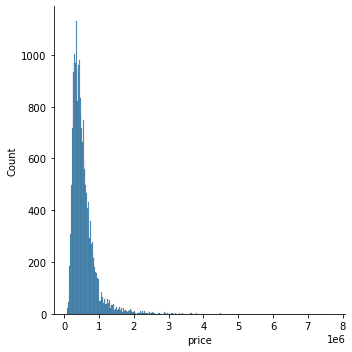

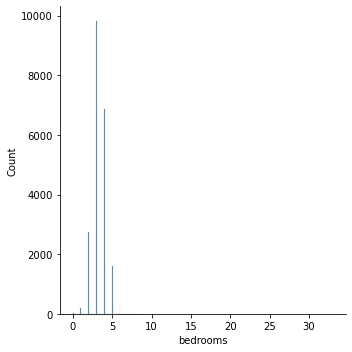

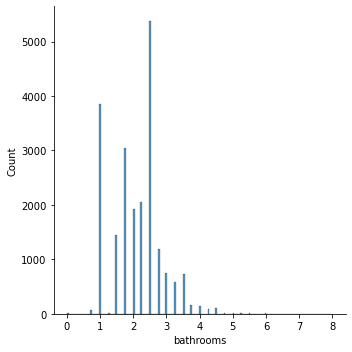

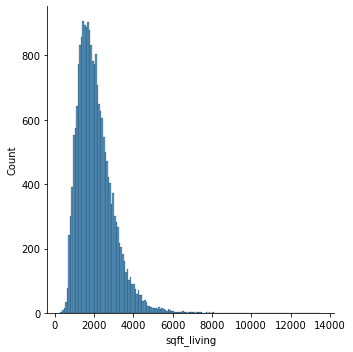

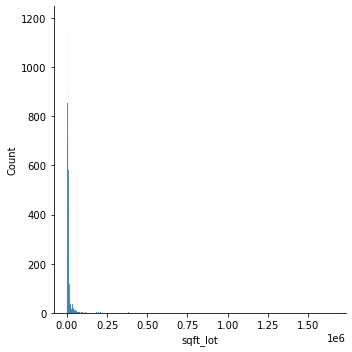

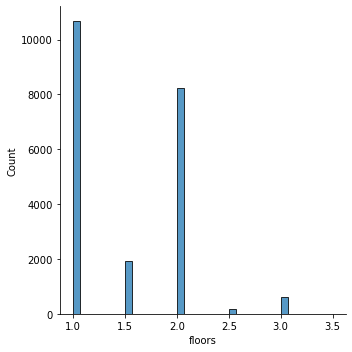

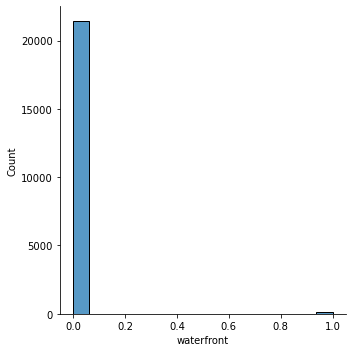

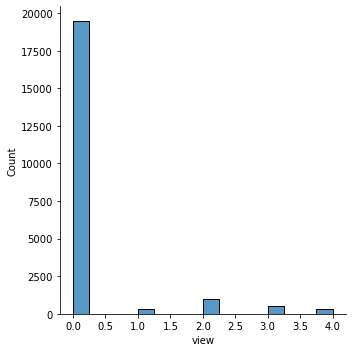

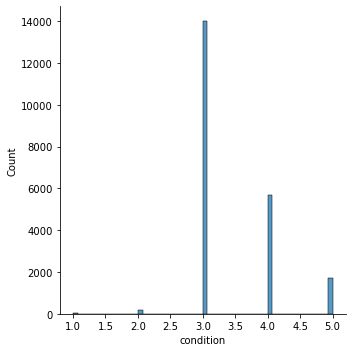

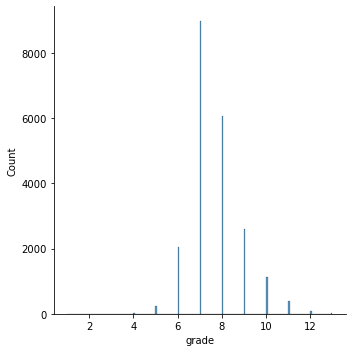

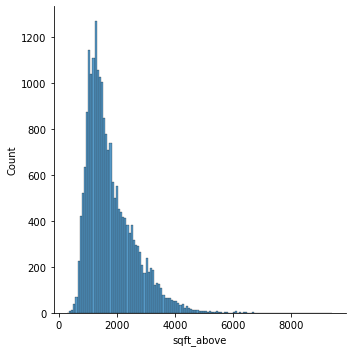

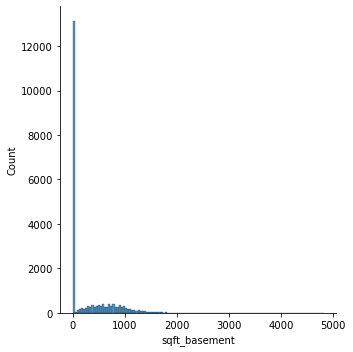

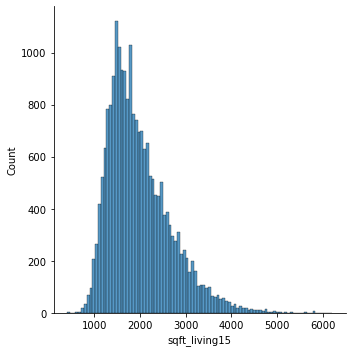

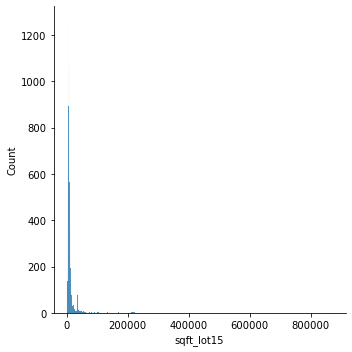

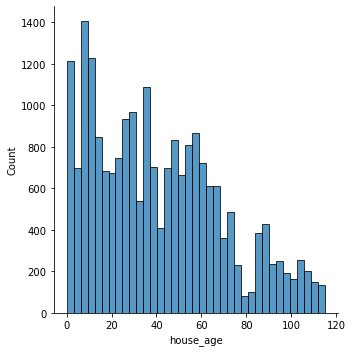

In [19]:
#distribution plot for all columns
for i in house_df.columns:
    sns.displot(house_df[i])
    plt.show()

<Figure size 432x288 with 0 Axes>

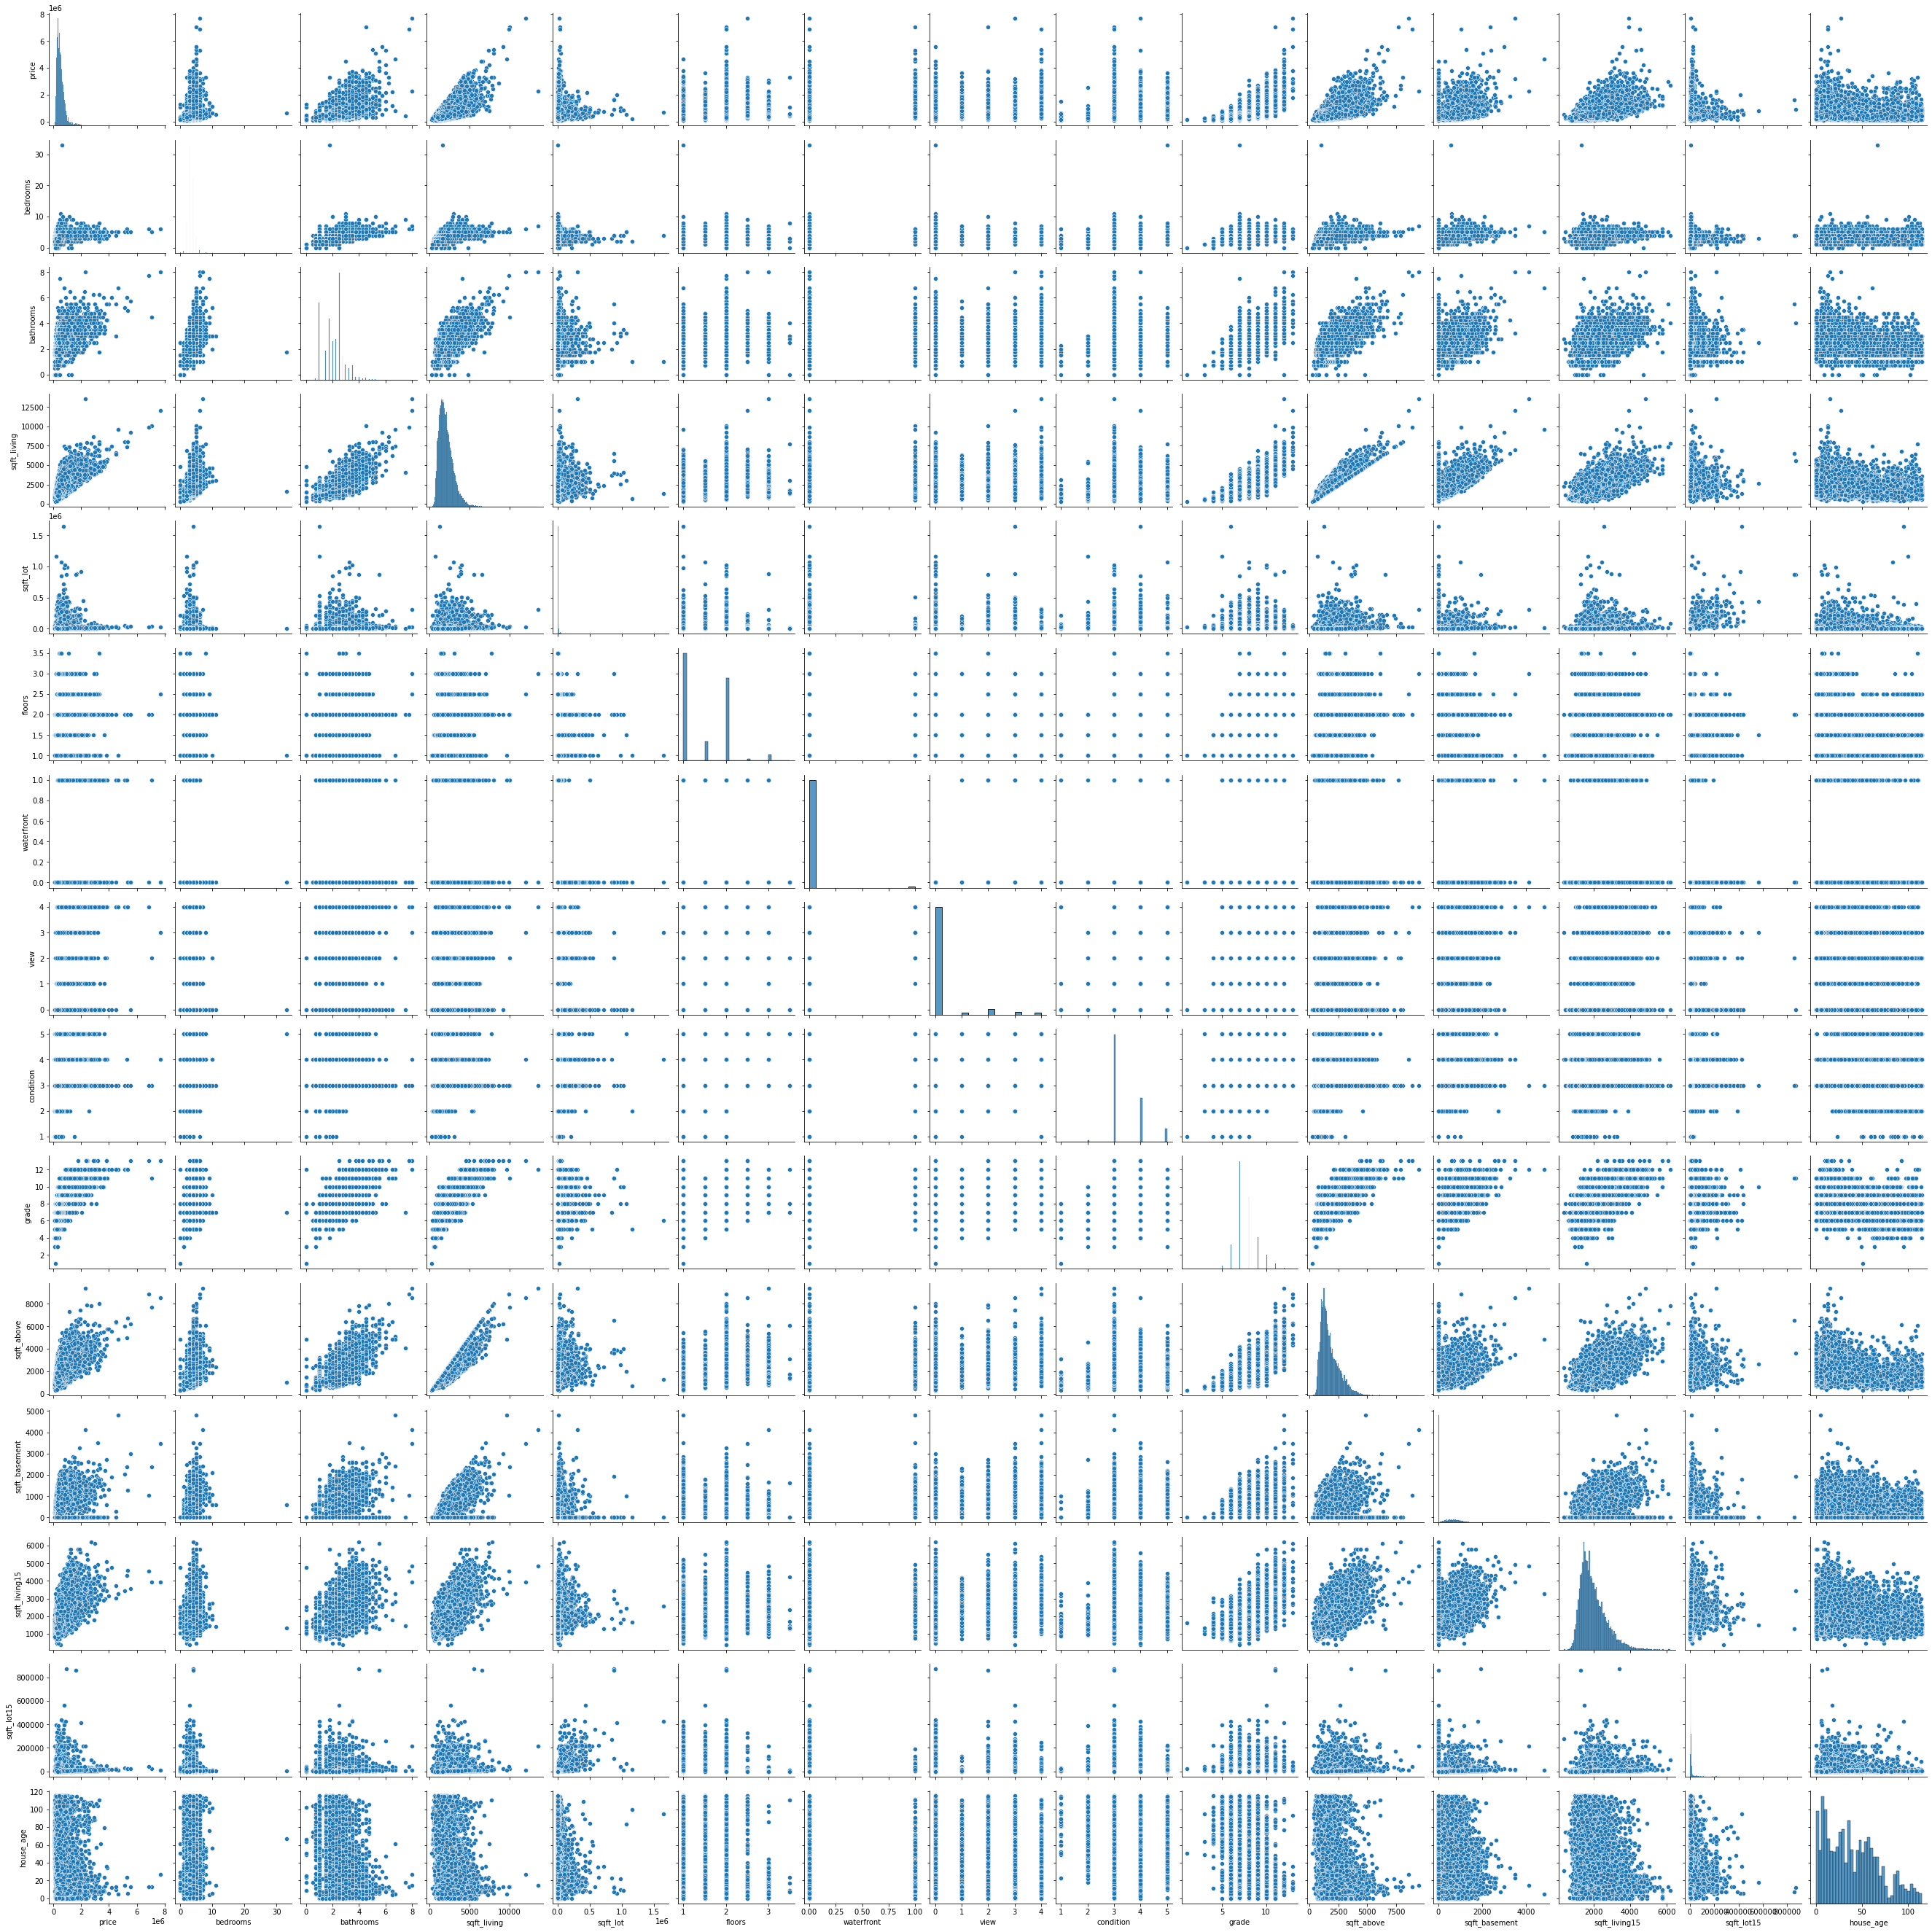

In [20]:
#pairplot
plt.figure()
sns.pairplot(house_df)
plt.show()

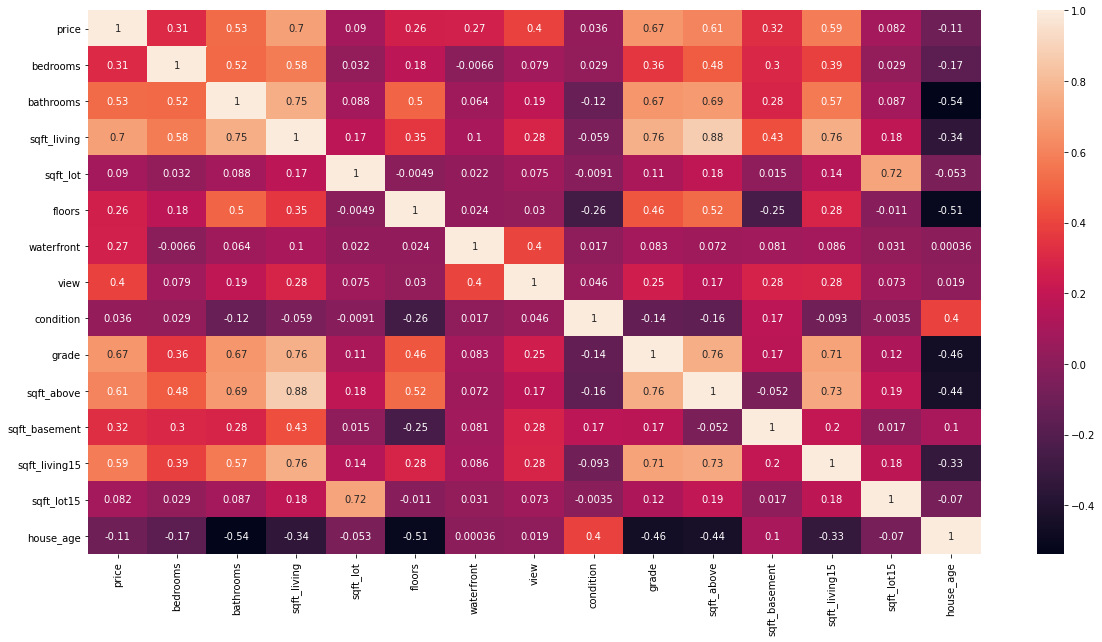

In [21]:
#heatmap
plt.figure(figsize = (20,10))
sns.heatmap(house_df.corr(), annot=True)
plt.show()

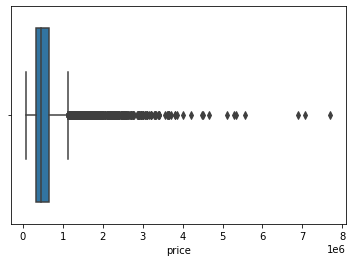

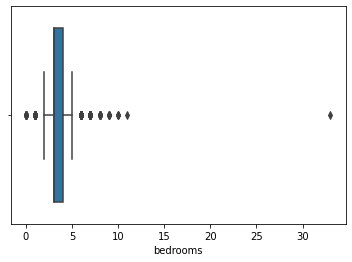

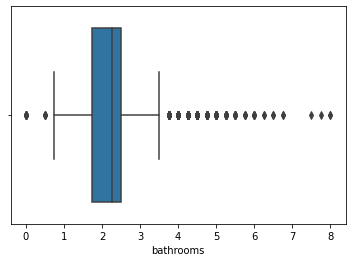

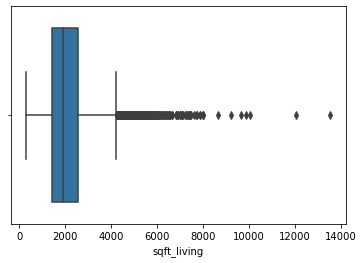

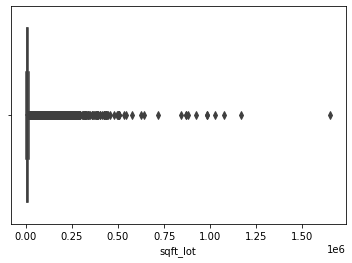

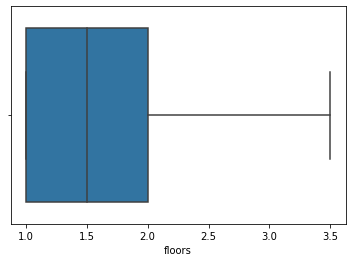

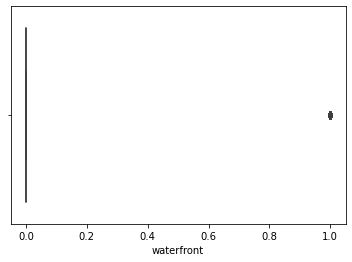

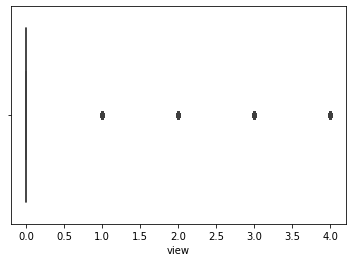

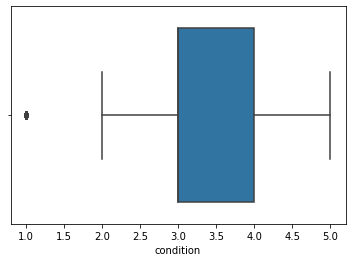

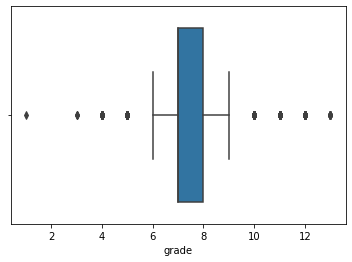

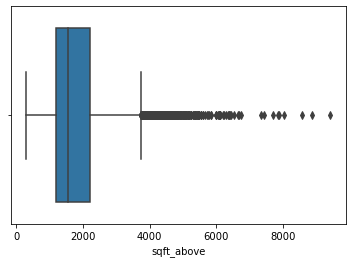

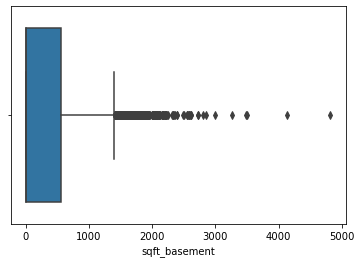

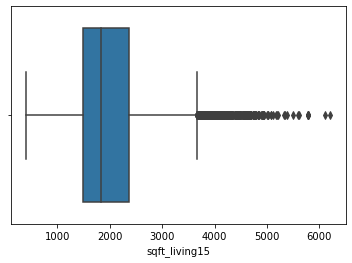

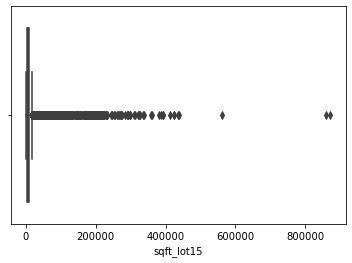

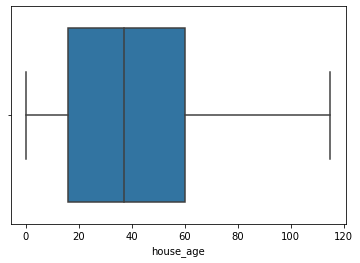

In [22]:
#box plot for all columns
for i in house_df.columns:
    sns.boxplot(x=house_df[i])
    plt.show()

In [23]:
house_df.drop('price', axis=1).head()
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [25]:
#split the dataframe into input X and output y
X = house_df.drop('price', axis=1)
y = house_df['price']

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [26]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [74]:
#Defining the model
model = keras.Sequential()
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(14, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

In [75]:
#optimizer is stochastic graident 
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# This builds the model for the first time:
history = model.fit(X, y, validation_split=0.33, batch_size=32, epochs=20)

Epoch 1/20
453/453 [==============================] - 2s 2ms/step - loss: 423684210760.1762 - mse: 423684210760.1762 - mae: 511960.1177 - val_loss: 240925212672.0000 - val_mse: 240925212672.0000 - val_mae: 355304.3750
Epoch 2/20
453/453 [==============================] - 1s 2ms/step - loss: 166577880691.0308 - mse: 166577880691.0308 - mae: 262346.9926 - val_loss: 73999736832.0000 - val_mse: 73999736832.0000 - val_mae: 173715.9531
Epoch 3/20
453/453 [==============================] - 1s 2ms/step - loss: 68341055857.9031 - mse: 68341055857.9031 - mae: 168238.1903 - val_loss: 70690390016.0000 - val_mse: 70690390016.0000 - val_mae: 176634.6719
Epoch 4/20
453/453 [==============================] - 1s 2ms/step - loss: 69234104338.0441 - mse: 69234104338.0441 - mae: 166718.8266 - val_loss: 70118621184.0000 - val_mse: 70118621184.0000 - val_mae: 177409.5625
Epoch 5/20
453/453 [==============================] - 1s 2ms/step - loss: 69677633075.8766 - mse: 69677633075.8766 - mae: 169076.7080 - va

In [76]:
#model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_43 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_44 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 60        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 5         
Total params: 695
Trainable params: 695
Non-trainable params: 0
_________________________________________________________________


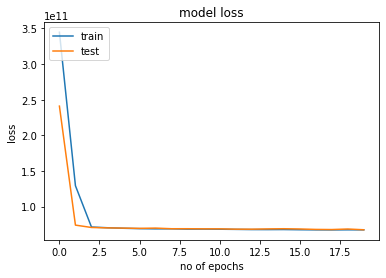

In [78]:
#plotting the training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [80]:
#predicting the house price for a single house
import numpy
from numpy import array

#the input data for getting the price
Xnew = numpy.array([[2,3,1280,5550,1,0,0,4,7,2280,0,1440,5750,60]])
#convert the values in the arry to float
Xnew = numpy.array(Xnew, dtype=numpy.float64)

#making the prediction
Ynew = model.predict(Xnew)

#print the prediction
print(Ynew[0])

[442513.4]
